In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv(r'C:\Users\franc\Desktop\TESI\SML_thesis_line_follower_robot\tmp\e-puck\data\data\sensors_data\sensor_data_2024-08-27_18-00-59.csv')
df

,sensor0,sensor1,sensor2,target
0,809.620669,300.926005,298.750757,455.434956
1,823.739009,297.864249,823.023829,200.357590
2,837.412041,301.018961,835.272225,201.069908
3,848.042928,301.655456,369.861825,439.090552
4,858.105229,354.426478,861.109917,198.497656
...,...,...,...,...
2373,418.381716,418.573544,414.555374,201.913171
2374,416.710947,419.853411,418.027708,199.341620
2375,417.178757,415.913156,416.417784,200.380487
2376,417.319411,416.464023,415.284594,201.017408


In [14]:
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.palettes import Pastel1
from bokeh.models import Span

In [115]:
left_df = df[(df['sensor0'] - df['sensor1'].mean()).abs() > 15]
removed_indices = df.index[(df['sensor0'] - df['sensor1'].mean()).abs() <= 15].tolist()
rolling_mean_left = left_df['sensor0'].rolling(window=200,min_periods=1).median().reset_index(drop=True)
sensor1_mean = df['sensor1'].mean()

In [116]:
rolling_mean_left

0       809.620669
1       816.679839
2       823.739009
3       830.575525
4       837.412041
           ...    
2311    415.460322
2312    415.460322
2313    415.460322
2314    415.460322
2315    415.313513
Name: sensor0, Length: 2316, dtype: float64

In [125]:

drift_detector = drift.ADWIN(min_window_length=200,delta=0.000001)
drifts = []
drift_r = []
j = 0
for i,val in enumerate(rolling_mean_left):
    if i in removed_indices:
        j+=1
    drift_detector.update(val)
    if drift_detector.drift_detected:
        print(f'drift_at{i-j}')
        print(f'drift_at{i}')
        drift_r.append(i)
        drifts.append(i-j)


print(j)

drift_at552
drift_at575
drift_at1048
drift_at1087
drift_at1624
drift_at1663
drift_at2086
drift_at2143
62


In [121]:
def plot_data(y_data, drifts=None):
    output_notebook()
    color_0 = Pastel1[3][0]

    # Create a new plot with appropriate dimensions
    p = figure(plot_width=900, plot_height=400,
               tools="pan,box_zoom,reset,save",
               title="Drift Stream",
               x_axis_label='Samples', y_axis_label='Value',
               background_fill_color="#fafafa")

    # Plot the data points
    p.circle(range(len(y_data)), y_data, legend_label="Rolling Mean",
             fill_color=color_0, line_color=color_0, size=4)

    # Add drift lines
    if drifts is not None:
        for drift_loc in drifts:
            drift_line = Span(location=drift_loc, dimension='height',
                              line_color='red', line_width=2)
            p.add_layout(drift_line)
    
    show(p)

In [126]:
plot_data(df['sensor0'], drifts)

Loading BokehJS ...

In [127]:
plot_data(rolling_mean_left, drift_r)

Loading BokehJS ...

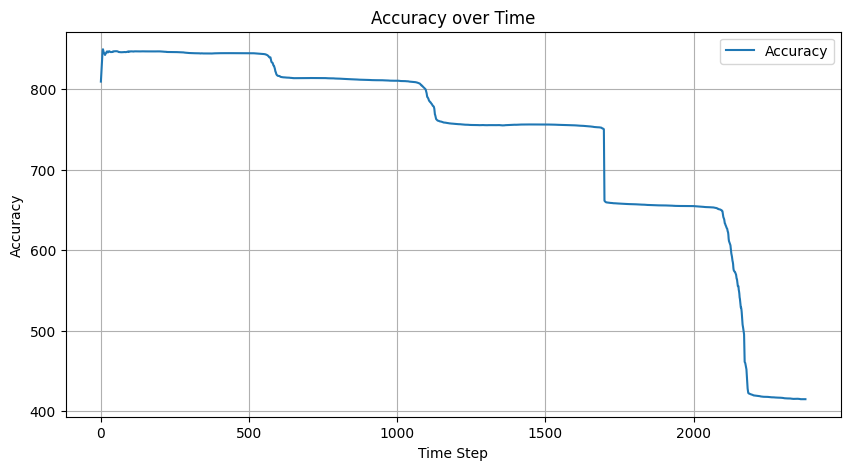

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(rolling_mean_left, label='Accuracy')
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.legend()
plt.grid(True)